# 07MAIR - Redes Neuronales y Deep Learning
## Clase 04: Deep learning para texto y secuencias

### Profesores: Adrián Colomer / Gabriel Enrique Muñoz
### Autor: Carlos Fernández Musoles


In [1]:
# SOLO PARA USO EN GOOGLE COLABORATORY
# para conectar el notebook con la cuenta de gdrive
from google.colab import drive
drive.mount('/content/drive/')
!ls "/content/drive/My Drive/"
BASE_FOLDER = '/content/drive/My Drive/Master IA/Autores/07MAIR/Intro Deep learning/Recursos del profesor 2019/'

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/
 1810_REGISTRO_ACADEMICO_MASTER_INTELIGENCIA_ARTIFICIAL   GRABACIONES_CLAUSTROS
 1904_REGISTRO_ACADEMICO_MASTER_INTELIGENCIA_ARTIFICIAL  'Master IA'
 1910_REGISTRO_ACADEMICO_MASTER_INTELIGENCIA_ARTIFICIAL


In [2]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 1209144162200464798
, name: "/device:XLA_CPU:0"
device_type: "XLA_CPU"
memory_limit: 17179869184
locality {
}
incarnation: 5003792131595533568
physical_device_desc: "device: XLA_CPU device"
, name: "/device:XLA_GPU:0"
device_type: "XLA_GPU"
memory_limit: 17179869184
locality {
}
incarnation: 10497383662667302350
physical_device_desc: "device: XLA_GPU device"
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 14912199066
locality {
  bus_id: 1
  links {
  }
}
incarnation: 12854417873807639633
physical_device_desc: "device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5"
]


# Deep learning para texto y secuencias
- Hasta ahora instancias individuales: Imagen
- Secuencias de unidades o sucesiones con sentido: Texto (unidad -> carácter, palabra)
- Redes recurrentes (LSTM) y 1D conv nets
- Instante t -> LSTMs recuerdan informacion de instantes anteriores t-x
- Aplicaciones en: clasificación de documentos, comparación de textos, aprendizaje secuencia-a-secuencia (traduccion), analisis de sentimiento, predicción, etc.

### Hand-driven learning
- Bag of words, formadas por n-gramas (sets de n o menos palabras consecutivas)
- Pierde el sentido de secuencia
- Útil para métodos clásicos (regresión y random forests)

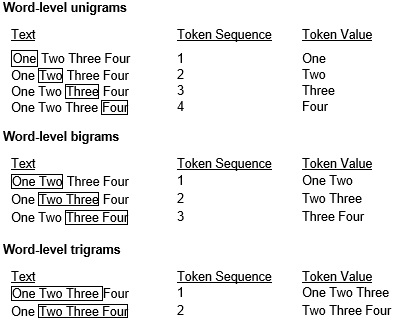

In [3]:
from IPython.display import Image
Image(filename=BASE_FOLDER+"img/n-grams.jpg")
# source https://www.sqlservercentral.com/articles/nasty-fast-n-grams-part-1-character-level-unigrams

### Automatic learning (deep learning)
- Se suele trabajar con secuencias de palabras
- Transformar palabras a vectores
 - One hot encoding
 - word embedding

## one hot encoding
- Vector de longitud numero de palabras
- 1 indica el indice de la palabra

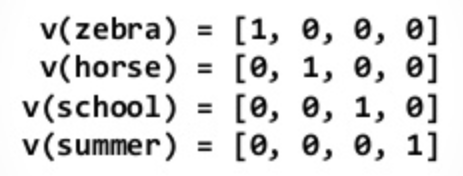

In [4]:
from IPython.display import Image
Image(filename=BASE_FOLDER+"img/hot_encoding.PNG")

In [5]:
# keras tiene herramientas para hacer one hot encoding
from keras.preprocessing.text import Tokenizer

samples = ['En un rincon de la mancha','De cuyo nombre no quiero acordarme']

# construir el indice de palabras
tokenizer = Tokenizer(num_words=1000) # solo considerar las 1000 palabras mas frecuentes
tokenizer.fit_on_texts(samples)

Using TensorFlow backend.


In [6]:
sequences = tokenizer.texts_to_sequences(samples) # convierte las frases en listas de indices
sequences

[[2, 3, 4, 1, 5, 6], [1, 7, 8, 9, 10, 11]]

In [7]:
#palabras e indices
word_index = tokenizer.word_index
word_index

{'acordarme': 11,
 'cuyo': 7,
 'de': 1,
 'en': 2,
 'la': 5,
 'mancha': 6,
 'no': 9,
 'nombre': 8,
 'quiero': 10,
 'rincon': 4,
 'un': 3}

### One hot encoding alternativas
- One hot encoding da lugar a
 - requisitos de memoria (vectores de tamaño del vocabulario, mantener lista de índices y palabras)
 

### Ejercicio
Investigar cómo funciona one hot encoding mediante hash functions (palabras a índices)

## Word embedding
- Menos dimensiones y más densos (utilizando valores decimales en vez de solo 1 y 0)

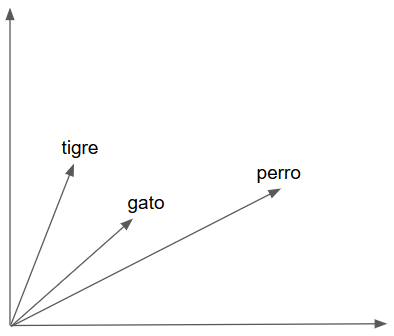

In [8]:
from IPython.display import Image
Image(filename=BASE_FOLDER+"img/word_embedding.PNG")

### Propiedades
Debe representar las relaciones semánticas entre palabras
- Distancia entre vectores aproxima distancia entre significados (pato y ganso vs pato y mesa)
- Transformación matemática según información semántica
- A mayor complejidad del diccionario más dimensiones del WE

No existe un word embedding universal
- Depende del idioma (cultura)
- Depende del dominio (banco en finanzas o arquitectura)

### Obtener word embeddings
- Aprenderlos como un problema de ML
- Obtener pre-entrenados (no lo veremos, ejemplo: GloVe en http://nlp.stanford.edu/projects/glove )

#### Aprenderlos
- Utilizando la capa Embedding
 - input índice de palabras (secuencia)
 - output tensor codificando la secuencia

In [9]:
# error "Object arrays cannot be loaded when allow_pickle=False"
# bug: bajar la version de numpy a 1.16.1
!pip install numpy==1.16.1

     |████████████████████████████████| 17.3MB 200kB/s 
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: numpy 1.17.5
    Uninstalling numpy-1.17.5:
      Successfully uninstalled numpy-1.17.5


# IMDB 
Clasificación de sentimiento (positivo vs negativo) en base a reviews de películas

In [0]:
# ejemplo reviews IMDB
from keras.datasets import imdb
from keras import preprocessing

max_features = 10000 # considerar las 10000 palabras mas frecuentes (HYP)
maxlen = 20 # reducir las secuencias a 20 palabras

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
# capar las reviews a maxlen numero de palabras
x_train = preprocessing.sequence.pad_sequences(x_train,maxlen=maxlen)
x_test = preprocessing.sequence.pad_sequences(x_test,maxlen=maxlen)

In [0]:
# crear el modelo con el embedding
# durante el entrenamiento, los pesos del embedding se modificaran para maximizar su utilidad
from keras.models import Sequential
from keras.layers import Flatten, Dense, Embedding

model = Sequential()
model.add(Embedding(max_features, # max numero de tokens
                    8, # dimensionalidad de los embeddings (HYP)
                    input_length=maxlen))
model.add(Flatten())
model.add(Dense(1,activation='sigmoid')) # clasificador

# compilar
model.compile(optimizer='adam',loss='mse',metrics=['acc'])
model.summary()

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 20, 8)             80000     
_________________________________________________________________
flatten_1 (Flatten)          (None, 160)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 161       
Total params: 80,161
Trainable params: 80,161
Non-trainable params: 0
_________________________________________________________________


In [0]:
# entrenar
history  = model.fit(x_train,y_train,epochs=10,batch_size=64,validation_split=0.2)

Instructions for updating:
Use tf.cast instead.
Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 4s 213us/step - loss: 0.6759 - acc: 0.6050 - val_loss: 0.6398 - val_acc: 0.6814
Epoch 2/10
20000/20000 [==============================] - 2s 91us/step - loss: 0.5657 - acc: 0.7427 - val_loss: 0.5467 - val_acc: 0.7206
Epoch 3/10
20000/20000 [==============================] - 2s 92us/step - loss: 0.4752 - acc: 0.7808 - val_loss: 0.5113 - val_acc: 0.7384
Epoch 4/10
20000/20000 [==============================] - 2s 91us/step - loss: 0.4263 - acc: 0.8077 - val_loss: 0.5008 - val_acc: 0.7452
Epoch 5/10
20000/20000 [==============================] - 2s 89us/step - loss: 0.3930 - acc: 0.8258 - val_loss: 0.4981 - val_acc: 0.7538
Epoch 6/10
20000/20000 [==============================] - 2s 92us/step - loss: 0.3668 - acc: 0.8395 - val_loss: 0.5014 - val_acc: 0.7530
Epoch 7/10
20000/20000 [==============================] - 2s 91us/step - loss: 0

~75% accuracy con un modelo simple (no considera el orden de las palabras por el uso de flatten y dense)

## Utilizando redes recurrentes: LSTM
- Redes en las que el output tiene conexiones con partes iniciales de la red
- Proporciona memoria a la red, analizar secuencias de inputs

#### Long Short-term Memory
- Propuesto por *Hochreiter and Schmidhuber (1997), "Long Short-Term Memory". Neural Computation 9, no. 8.*
- Como red recurrente, el output de la inferencia anterior influye al de la siguiente
- Elemento (carry) que no entra en la red y modula el elemento recurrente antes de entrar

El output de cada unidad de una celula de LSTM depende de
- input
- output anterior
- memoria (computado a partir del output)

In [0]:
from IPython.display import Image
Image(filename=BASE_FOLDER+"img/lstm.png")
#Imagen de: https://medium.com/mlreview/understanding-lstm-and-its-diagrams-37e2f46f1714 (accedido el 15/02/2019)

In [0]:
# ejemplo reviews IMDB
from keras.datasets import imdb
from keras import preprocessing

max_features = 10000 # considerar las 10000 palabras mas frecuentes
maxlen = 20 # reducir las secuencias a 20 palabras

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
# capar las reviews a maxlen numero de palabras
x_train = preprocessing.sequence.pad_sequences(x_train,maxlen=maxlen)
x_test = preprocessing.sequence.pad_sequences(x_test,maxlen=maxlen)

In [0]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Embedding

model = Sequential()
model.add(Embedding(max_features,8, input_length=maxlen))
model.add(LSTM(32)) #Unidades LSTM (en cascada)
model.add(Dense(1,activation='sigmoid'))

# compilar
model.compile(optimizer='adam',loss='mse',metrics=['acc'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_10 (Embedding)     (None, None, 8)           80000     
_________________________________________________________________
lstm_9 (LSTM)                (None, 32)                5248      
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 33        
Total params: 85,281
Trainable params: 85,281
Non-trainable params: 0
_________________________________________________________________


In [0]:
# entrenar
history  = model.fit(x_train,y_train,epochs=20,batch_size=64,validation_split=0.2)

## Mejorando LSTM
- Dropout recurrente (dentro de la misma capa LSTM) https://arxiv.org/pdf/1512.05287.pdf
- Concatenar capas recurrentes para más expresividad

In [0]:
# uso de dropout recurrente (recurrent_dropout)
from keras.models import Sequential
from keras.layers import Dense, LSTM, Embedding

recurrent_dropout = Sequential()
recurrent_dropout.add(Embedding(max_features,8, input_length=maxlen))
recurrent_dropout.add(LSTM(32,recurrent_dropout=0.25))
recurrent_dropout.add(Dense(1,activation='sigmoid'))

# compilar
recurrent_dropout.compile(optimizer='adam',loss='mse',metrics=['acc'])
# entrenar
history = recurrent_dropout.fit(x_train,y_train,epochs=20,batch_size=64,validation_split=0.2)

## Uso de LSTM para generar secuencias de texto
- Modelos de lenguaje, dada una serie de palabras, predecir (probabilistico) la proxima palabra o secuencia
- Sampling estocástico:  (elegir random en base a la probabilidad)
 - ventajas?


- produce frases más interesantes (creatividad)
- parámetro que controla esta estocaticidad es temperatura

In [0]:
# ejemplo con el quijote
with open(BASE_FOLDER+"resources/quijote.txt",'r') as f:
    replace_chars = {'\n': ' ',
                    '\xad':'',
                    '±':'',
                    '³':'',
                    'º':'',
                    '¼':'',
                    'â':'a',
                    'ã':'a',
                    '©':''
    }
    corpus = f.read().lower()
    for old, new in replace_chars.items():
        corpus = corpus.replace(old,new)

# vectorizar el texto

maxlen = 60 #longitud de las secuencias
step = 3 # cada cuantas letras empezar una secuencia

sentences = []
next_chars = []

for i in range(0,len(corpus) - maxlen,step):
    sentences.append(corpus[i: i + maxlen])
    next_chars.append(corpus[i + maxlen])

In [0]:
# obtene letras unicas
unique_chars = sorted(list(set(corpus)))
char_indices = {char : i for i,char in enumerate(unique_chars) }
print(char_indices)

{' ': 0, '!': 1, '"': 2, '(': 3, ')': 4, ',': 5, '-': 6, '.': 7, ':': 8, ';': 9, '?': 10, 'a': 11, 'b': 12, 'c': 13, 'd': 14, 'e': 15, 'f': 16, 'g': 17, 'h': 18, 'i': 19, 'j': 20, 'k': 21, 'l': 22, 'm': 23, 'n': 24, 'o': 25, 'p': 26, 'q': 27, 'r': 28, 's': 29, 't': 30, 'u': 31, 'v': 32, 'x': 33, 'y': 34, 'z': 35, '¡': 36, '¿': 37, 'á': 38, 'é': 39, 'í': 40, 'ñ': 41, 'ó': 42, 'ú': 43, 'ü': 44}


In [0]:
import numpy as np

# vectorizacion (one hot encoding)
x = np.zeros((len(sentences), maxlen,len(unique_chars)), dtype=np.bool) # cada secuencia, hot encoded
y = np.zeros((len(sentences), len(unique_chars)), dtype=np.bool) # para cada secuencia, el siguiente caracter hot encoded
for i, sentence in enumerate(sentences):
    for t, char in enumerate(sentence):
        x[i,t,char_indices[char]] = 1
    y[i,char_indices[next_chars[i]]] = 1
x.shape

(103718, 60, 45)

In [0]:
# modelo con LSTM
from keras import layers
from keras import models

# cuando se concatenan LSTM, parametro return_sequences=True excepto en la ultima
# significa que las capas intermedias pasan toda la secuencia de outputs, pero la ultima solo pasa el ultimo output
model = models.Sequential()
model.add(LSTM(256, input_shape=(maxlen,len(unique_chars)),return_sequences=True)) # devuelve una secuencia de vectores de 128 dimensiones
model.add(LSTM(64))  
model.add(layers.Dense(len(unique_chars), activation='softmax')) # softmax para que el output sume 1

model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['acc'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 60, 256)           309248    
_________________________________________________________________
lstm_3 (LSTM)                (None, 64)                82176     
_________________________________________________________________
dense_4 (Dense)              (None, 45)                2925      
Total params: 394,349
Trainable params: 394,349
Non-trainable params: 0
_________________________________________________________________


In [0]:
# entrenar el modelo
history = model.fit(x,y,batch_size=128,epochs=30)

Epoch 1/30
103718/103718 [==============================] - 138s 1ms/step - loss: 2.4918 - acc: 0.2767
Epoch 2/30
103718/103718 [==============================] - 134s 1ms/step - loss: 2.0649 - acc: 0.3739
Epoch 3/30
103718/103718 [==============================] - 136s 1ms/step - loss: 1.9265 - acc: 0.4142
Epoch 4/30
 58368/103718 [===============>..............] - ETA: 58s - loss: 1.8430 - acc: 0.4357

KeyboardInterrupt: ignored

In [0]:
import numpy as np

def transform_distribution(predictions, temperature=0.5):
    predictions = np.array(predictions).astype('float64')
    # temperaturas altas: mas entropia (mas aleatorio)
    # temperaturas bajas: menos estocasticidad (mas deterministico)
    predictions = np.log(predictions) / temperature
    exp_predictions = np.exp(predictions)
    predictions = exp_predictions / np.sum(exp_predictions) # asegurarse que los valores suman 1 (probabilidad)
    probs = np.random.multinomial(1, predictions, 1)
    return np.argmax(probs)

In [0]:
import random
# generar secuencias arbitrarias de texto
predict_length = 400
temperature = 0.8
# random text seed
start_index = random.randint(0,len(corpus) - maxlen - 1)
input_text = corpus[start_index: start_index + maxlen]
print('Seed: ' + input_text)
generated_text = input_text

for i in range(predict_length):
    sampled = np.zeros((1, maxlen, len(unique_chars)))
    for t, char in enumerate(input_text):
        sampled[0,t,char_indices[char]] = 1.
    
    prediction = model.predict(sampled, verbose=0)[0]
    next_index = transform_distribution(prediction,temperature)
    next_char = unique_chars[next_index]
    
    #pegar el nuevo texto
    input_text += next_char
    generated_text += next_char
    input_text = input_text[1:]

generated_text

Seed: ejar del más pequeño dolor que tenga, si ya no se entiende t


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in log
  import sys


'ejar del más pequeño dolor que tenga, si ya no se entiende tan cuando diablo, sino a viento a su donde y al pasado anda a ver lidor que por al salió al piendo mis ardar a sover con la querado por la mejura, y no habiéndole sin muchas retilas le estiba, sino los cuales apetrar todos los que en todo esto no dejaba puede del ofregar diocen aumpresad, yo que aquella noche me han el tedoro tía das que se la desaba prince alguna fiera. esta penviana, por que se '